In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter
from preprocessamento import *
from preprocessamento import preprocessar
from sklearn.tree import  export_graphviz

Importing Jupyter notebook from preprocessamento.ipynb


### Carregamento dos dados, e preprocessamento

In [35]:
dados_2015 = pd.read_csv('../arquivos/2015.csv')
dados_2016 = pd.read_csv('../arquivos/2016.csv')

In [36]:
#dados_2015

In [37]:
dados_2015.columns

Index(['Indicação de data e hora', 'situacao', 'Sexo:',
       'Com qual cor/etnia você se identifica?', 'Qual o seu estado civil?',
       'Tem filhos?', 'Qual a renda mensal de sua família?',
       'Com quem você está morando atualmente?', 'Você está residindo em:',
       'Tomando como base seu local de moradia atual, qual a distância de onde reside para a universidade?',
       'Qual meio de transporte você utiliza para chegar à universidade?',
       'Você apresenta alguma necessidade educacional especial?',
       'Que tipo de escola você cursou o ensino fundamental?',
       'Que tipo de escola você cursou o ensino médio?',
       'Qual sua forma de ingresso na UFC Campus Quixadá?',
       'Como você tomou conhecimento do curso de sua escolha aqui na UFC de Quixadá?',
       'Você trabalha ou exerce alguma atividade remunerada (emprego)?',
       'Fora da universidade, você participa de algum tipo de atividade, organização e associação?',
       'Indique o principal fator que d

In [5]:
df_2015 = preprocessar_todas_colunas(dados_2015)
df_2016 = preprocessar_todas_colunas(dados_2016)

frames = [df_2015, df_2016]

data_frame = pd.concat(frames)

In [6]:
target_2015 = gerar_target(dados_2015)
target_2016 = gerar_target(dados_2016)

targets = [target_2015, target_2016]

target = pd.concat(targets)

In [7]:
data_frame.shape

(466, 29)

In [8]:
cont = 0
for coluna in data_frame.columns:
    print("{} - {}".format(cont, coluna))
    cont += 1

0 - Sexo
1 - filhos
2 - renda
3 - quem_você_está_morando_atualmente
4 - estado_civil
5 - residindo_em
6 - distancia_ufc_casa
7 - meio_de_transporte
8 - apresenta_necessidade_educacional_especial
9 - tipo_escola_ensino_fundamental
10 - tipo_escola_ensino_medio
11 - forma_ingresso_ufc_qxd
12 - atividade_remunerada
13 - participa_algum_tipo_atividade_organização_associação
14 - afinidade_linguagens
15 - afinidade_humanas
16 - afinidade_matematica
17 - afinidade_natureza
18 - estudo_fora_sala
19 - motivacao_curso
20 - tarefa_durante_curso
21 - dedicacao_exigida
22 - disciplinas_ofertadas
23 - competencias_habilidades_requiridas
24 - condicoes_mercado_trabalho
25 - competencias_area_ti
26 - realizacao_profissional
27 - concluir_curso_nessa_instituicao
28 - nao_mudaria_de_curso


### Gerando Feature Importace com Extra Tree Classifier

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
forest = ExtraTreesClassifier()

In [11]:
import os

In [12]:
os.system('dot -Tpng tree.dot -o tree.png')

32512

In [13]:
forest.fit(data_frame, target)

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
importances_clf = forest.feature_importances_

In [15]:
std_clf = np.std([forest.feature_importances_ for tree in forest.estimators_],axis=0)

In [16]:
indices_clf = np.argsort(importances_clf)[::-1]

Feature ranking:
1. feature 27 (0.071680)
2. feature 2 (0.064216)
3. feature 19 (0.056024)
4. feature 26 (0.055795)
5. feature 21 (0.047686)
6. feature 11 (0.046775)
7. feature 23 (0.043617)
8. feature 16 (0.042867)
9. feature 20 (0.040677)
10. feature 10 (0.038533)
11. feature 18 (0.037311)
12. feature 28 (0.037137)
13. feature 7 (0.036257)
14. feature 25 (0.036181)
15. feature 3 (0.035646)
16. feature 13 (0.033798)
17. feature 24 (0.032977)
18. feature 14 (0.031367)
19. feature 6 (0.031337)
20. feature 15 (0.031199)
21. feature 17 (0.030155)
22. feature 9 (0.029021)
23. feature 22 (0.026792)
24. feature 0 (0.021422)
25. feature 4 (0.012413)
26. feature 12 (0.009635)
27. feature 8 (0.009154)
28. feature 1 (0.008801)
29. feature 5 (0.001528)


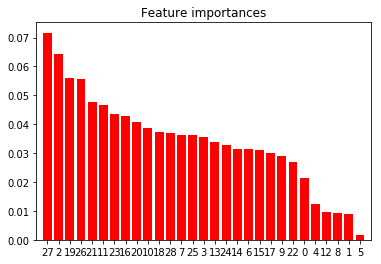

In [17]:
print("Feature ranking:")

for f in range(data_frame.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_frame.shape[1]), importances_clf[indices_clf],
       color="r", yerr=std_clf[indices_clf], align="center")
plt.xticks(range(data_frame.shape[1]), indices_clf)
plt.xlim([-1, data_frame.shape[1]])
plt.show()
# """
# print("Feature ranking:")

# for f in range(dados_2016.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))

# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(dados_2016.shape[1]), importances_clf[indices_clf],
#        color="r", yerr=std_clf[indices_clf], align="center")
# plt.xticks(range(dados_2016.shape[1]), indices_clf)
# plt.xlim([-1, dados_2016.shape[1]])
# plt.show()
# """

In [18]:
export_graphviz(forest.estimators_[0], feature_names=data_frame.columns, filled=True, rounded=True, max_depth=3, class_names=['evadido', 'ativo'])

/home/igor/anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


### Gerando Feature Importace com RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [21]:
clf.fit(data_frame, target)

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
importances_rf = clf.feature_importances_

In [23]:
std_rf = np.std([clf.feature_importances_ for tree in clf.estimators_],axis=0)

In [24]:
indices_rf = np.argsort(importances_rf)[::-1]

In [38]:
cont = 0
for coluna in data_frame.columns:
    print("{} - {}".format(cont, coluna))
    cont += 1

0 - Sexo
1 - filhos
2 - renda
3 - quem_você_está_morando_atualmente
4 - estado_civil
5 - residindo_em
6 - distancia_ufc_casa
7 - meio_de_transporte
8 - apresenta_necessidade_educacional_especial
9 - tipo_escola_ensino_fundamental
10 - tipo_escola_ensino_medio
11 - forma_ingresso_ufc_qxd
12 - atividade_remunerada
13 - participa_algum_tipo_atividade_organização_associação
14 - afinidade_linguagens
15 - afinidade_humanas
16 - afinidade_matematica
17 - afinidade_natureza
18 - estudo_fora_sala
19 - motivacao_curso
20 - tarefa_durante_curso
21 - dedicacao_exigida
22 - disciplinas_ofertadas
23 - competencias_habilidades_requiridas
24 - condicoes_mercado_trabalho
25 - competencias_area_ti
26 - realizacao_profissional
27 - concluir_curso_nessa_instituicao
28 - nao_mudaria_de_curso


Feature ranking:
1. feature 2 (0.074626)
2. feature 26 (0.069513)
3. feature 19 (0.065344)
4. feature 27 (0.064696)
5. feature 20 (0.051577)
6. feature 7 (0.050413)
7. feature 9 (0.044338)
8. feature 28 (0.041993)
9. feature 6 (0.040700)
10. feature 15 (0.040179)
11. feature 18 (0.040026)
12. feature 17 (0.039435)
13. feature 23 (0.039268)
14. feature 14 (0.036971)
15. feature 21 (0.034563)
16. feature 24 (0.033539)
17. feature 22 (0.033231)
18. feature 16 (0.032137)
19. feature 11 (0.030902)
20. feature 10 (0.028873)
21. feature 0 (0.020942)
22. feature 3 (0.019872)
23. feature 13 (0.018881)
24. feature 25 (0.018353)
25. feature 12 (0.011058)
26. feature 5 (0.006427)
27. feature 1 (0.005489)
28. feature 4 (0.005031)
29. feature 8 (0.001623)


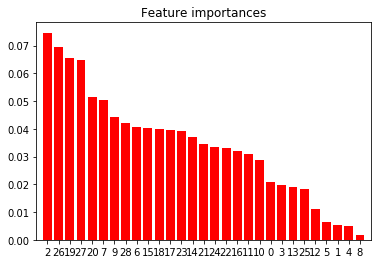

In [25]:
print("Feature ranking:")

for f in range(data_frame.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_frame.shape[1]), importances_rf[indices_rf],
       color="r", yerr=std_rf[indices_rf], align="center")
plt.xticks(range(data_frame.shape[1]), indices_rf)
plt.xlim([-1, data_frame.shape[1]])
plt.show()

### Gerando Feature Importace com RandomTreesEmbedding

In [26]:
from sklearn.ensemble import RandomTreesEmbedding

In [27]:
rte = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3)

In [28]:
rte.fit(data_frame, target)

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
importances = rte.feature_importances_

In [30]:
std = np.std([rte.feature_importances_ for tree in rte.estimators_],axis=0)

In [31]:
print(std)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.16840434e-19 6.93889390e-18 2.77555756e-17
 0.00000000e+00 0.00000000e+00 6.93889390e-18 4.33680869e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.46944695e-18
 0.00000000e+00 0.00000000e+00 6.93889390e-18 2.77555756e-17
 3.46944695e-18 1.73472348e-18 1.73472348e-18 1.73472348e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.77555756e-17
 6.93889390e-18]


In [32]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 27 (0.143153)
2. feature 19 (0.140630)
3. feature 7 (0.133873)
4. feature 26 (0.120132)
5. feature 2 (0.059123)
6. feature 14 (0.056867)
7. feature 18 (0.053002)
8. feature 10 (0.046809)
9. feature 17 (0.046128)
10. feature 28 (0.038924)
11. feature 6 (0.033117)
12. feature 24 (0.025282)
13. feature 15 (0.022221)
14. feature 25 (0.021347)
15. feature 20 (0.018964)
16. feature 23 (0.011049)
17. feature 21 (0.009885)
18. feature 22 (0.009728)
19. feature 11 (0.003812)
20. feature 3 (0.003196)
21. feature 13 (0.001426)
22. feature 5 (0.001332)
23. feature 4 (0.000000)
24. feature 1 (0.000000)
25. feature 9 (0.000000)
26. feature 8 (0.000000)
27. feature 12 (0.000000)
28. feature 16 (0.000000)
29. feature 0 (0.000000)


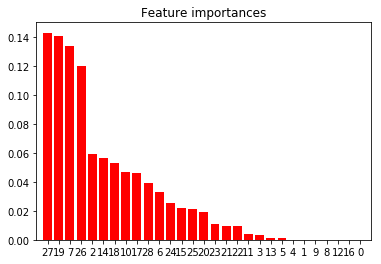

In [33]:
print("Feature ranking:")

for f in range(data_frame.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_frame.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_frame.shape[1]), indices)
plt.xlim([-1, data_frame.shape[1]])
plt.show()

In [34]:
cont = 0
for coluna in data_frame.columns:
    print("{} - {}".format(cont, coluna))
    cont += 1

0 - Sexo
1 - filhos
2 - renda
3 - quem_você_está_morando_atualmente
4 - estado_civil
5 - residindo_em
6 - distancia_ufc_casa
7 - meio_de_transporte
8 - apresenta_necessidade_educacional_especial
9 - tipo_escola_ensino_fundamental
10 - tipo_escola_ensino_medio
11 - forma_ingresso_ufc_qxd
12 - atividade_remunerada
13 - participa_algum_tipo_atividade_organização_associação
14 - afinidade_linguagens
15 - afinidade_humanas
16 - afinidade_matematica
17 - afinidade_natureza
18 - estudo_fora_sala
19 - motivacao_curso
20 - tarefa_durante_curso
21 - dedicacao_exigida
22 - disciplinas_ofertadas
23 - competencias_habilidades_requiridas
24 - condicoes_mercado_trabalho
25 - competencias_area_ti
26 - realizacao_profissional
27 - concluir_curso_nessa_instituicao
28 - nao_mudaria_de_curso
